📁 Please upload your CSV file


Saving inventory_demand_forecast.csv to inventory_demand_forecast (2).csv

✅ Data Loaded Successfully!
   ProductID ProductName    Category  Month  Year  UnitsSold  UnitPrice  \
0       1001    Notebook  Stationery      3  2023         67     147.86   
1       1002       Chair   Groceries      4  2023        301     148.09   
2       1003       Chair    Clothing      6  2023        280     151.80   
3       1004      Laptop   Groceries     10  2023         33      57.45   
4       1005       Shirt   Groceries      5  2023        495     165.95   

   StockAvailable  ReorderPoint  RestockLeadTime  
0             152            56                4  
1             135            68                7  
2             107            35               18  
3              96            66               16  
4             102            46               15  

===== Key KPIs =====
Total Products: 2000
Average Monthly Demand: 254.25
Products Below Reorder Point: 456
Products with High Lead Time Ris

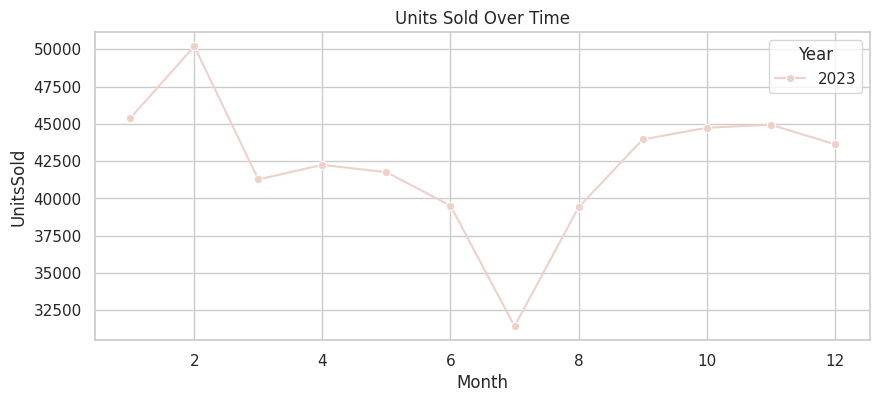

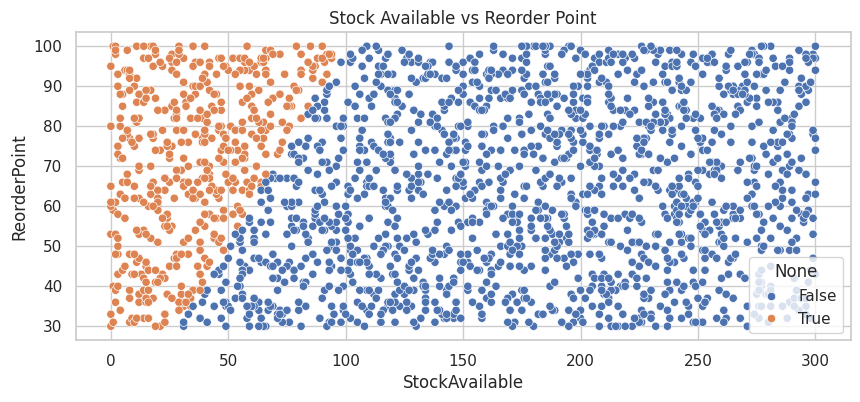

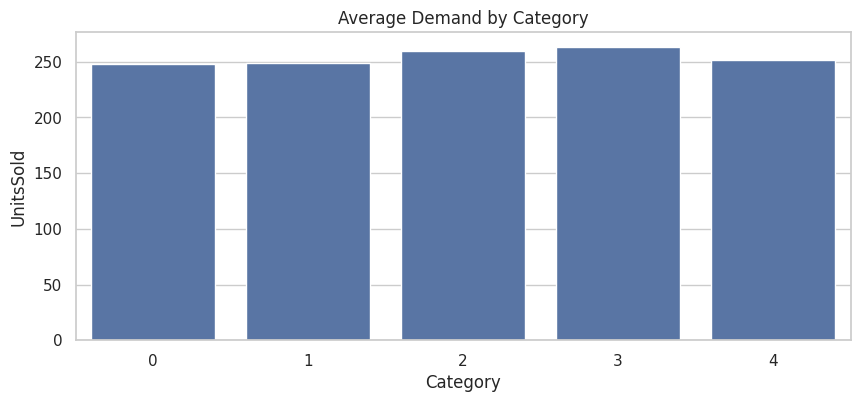

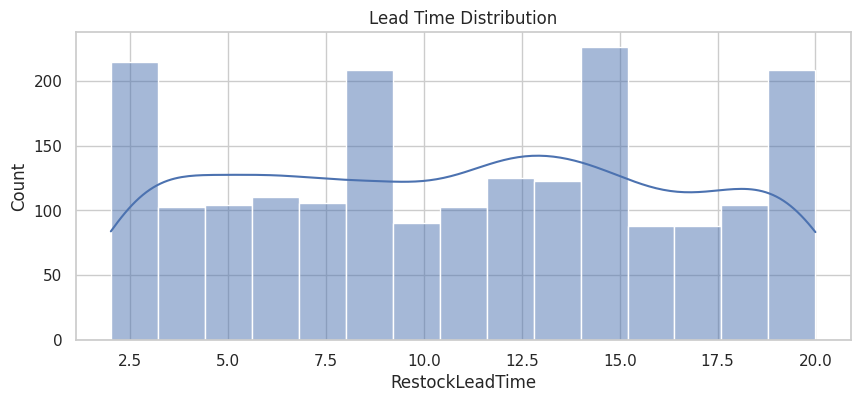


===== Predictive Model =====
MAE: 130.89280398809524
R² Score: -0.12696025724052018

===== Sample Output =====
   ProductID  ProductName  PredictedDemand  StockAvailable      RestockFlag
0       1001            3            93.07             152  Monitor closely
1       1002            1           290.41             135      Restock now
2       1003            1           273.80             107      Restock now
3       1004            2           115.35              96      Restock now
4       1005            4           409.20             102      Restock now
5       1006            0           155.77             237  Monitor closely
6       1007            0           413.74             292      Restock now
7       1008            2           157.88              18      Restock now
8       1009            1           139.09             187  Monitor closely
9       1010            1           267.31             142      Restock now


In [ ]:
# Inventory Forecasting and Restocking Alert System

# 📌 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

from google.colab import files

# 📌 Step 2: Upload File
print("📁 Please upload your CSV file")
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(file_name)
print("\n✅ Data Loaded Successfully!")
print(df.head())

# 📌 Step 3: Basic KPIs
print("\n===== Key KPIs =====")
print("Total Products:", df['ProductID'].nunique())
print("Average Monthly Demand:", round(df['UnitsSold'].mean(), 2))
print("Products Below Reorder Point:", (df['StockAvailable'] < df['ReorderPoint']).sum())
print("Products with High Lead Time Risk:", (df['RestockLeadTime'] > df['RestockLeadTime'].median()).sum())

# 📌 Step 4: Encode categorical data
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 📌 Step 5: Visualizations
sns.set(style="whitegrid")

# Units Sold Over Time
plt.figure(figsize=(10,4))
sns.lineplot(data=df.groupby(['Year','Month'])['UnitsSold'].sum().reset_index(), x='Month', y='UnitsSold', hue='Year', marker='o')
plt.title("Units Sold Over Time")
plt.show()

# Stock vs Reorder Point
plt.figure(figsize=(10,4))
sns.scatterplot(data=df, x='StockAvailable', y='ReorderPoint', hue=(df['StockAvailable'] < df['ReorderPoint']))
plt.title("Stock Available vs Reorder Point")
plt.show()

# Average Demand by Category
plt.figure(figsize=(10,4))
sns.barplot(data=df.groupby('Category')['UnitsSold'].mean().reset_index(), x='Category', y='UnitsSold')
plt.title("Average Demand by Category")
plt.show()

# Lead Time Risk Analysis
plt.figure(figsize=(10,4))
sns.histplot(df['RestockLeadTime'], bins=15, kde=True)
plt.title("Lead Time Distribution")
plt.show()

# 📌 Step 6: Predictive Model
features = ['Category', 'Month', 'Year', 'StockAvailable', 'RestockLeadTime']
target = 'UnitsSold'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n===== Predictive Model =====")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 📌 Step 7: Forecast Demand and Flag Products
forecast = df.copy()
forecast['PredictedDemand'] = model.predict(forecast[features])
forecast['RestockFlag'] = np.where(forecast['PredictedDemand'] > forecast['StockAvailable'], 'Restock now',
                            np.where((forecast['PredictedDemand'] > forecast['ReorderPoint']), 'Monitor closely', 'No action needed'))

print("\n===== Sample Output =====")
print(forecast[['ProductID', 'ProductName', 'PredictedDemand', 'StockAvailable', 'RestockFlag']].head(10))

# 📌 Optional: Save to CSV
# forecast.to_csv("forecasted_inventory.csv", index=False)
